In [ ]:
#Supervised Machine Learning Final Project
##Introduction
###This project focuses on a supervised learning classification problem: predicting whether a patient has diabetes based on 8 clinical variables.
###Diabetes is a major chronic disease affecting millions of people worldwide. Early detection allows for earlier intervention/treatment and can reduce complications from diabetes.
###The goal of this project is to classify if an individuaal has diabetes or not based on their demographics, such as age, glucose level, insulin, BMI, etc.
###The project utilizes KNN, decision tree, and random forest algorithms to create models for classifying if someone has diabetes or not.
###The dataset was created by Mehmet Akturk, which can be found on Kaggle and it was orignially from the National Institute of Diabetes and Digestive and Kidney Diseases. All of the individuals in the dataset are females 21 years old or older of Pima Indian heritage.
###The demographics that are included are number of pregnancies, plasma glucose level, blood pressure, skin thickness, insulin level, BMI, diabetes pedigree, and age. The outcome is 0 or 1 to classify if someone has diabetes or not, where 1 is when diabetes is present and 0 is no diabetes.
###There are 768 individuals included in the dataset.
###kaggle competition dataset link: https://www.kaggle.com/datasets/mathchi/diabetes-data-set/data
###GitHub repository link: https://github.com/claire01234/Supervised-Learning-Final-Project.git

In [623]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pickle
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import _tree
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [624]:
diabetes = pd.read_csv('/Users/ponyp/kaggle/input/diabetes.csv')

In [625]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [626]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [627]:
diabetes.shape

(768, 9)

In [628]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [629]:
invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
(diabetes[invalid_cols] == 0).sum()
diabetes[invalid_cols] = diabetes[invalid_cols].replace(0, np.nan)
diabetes.fillna(diabetes.median(), inplace=True)

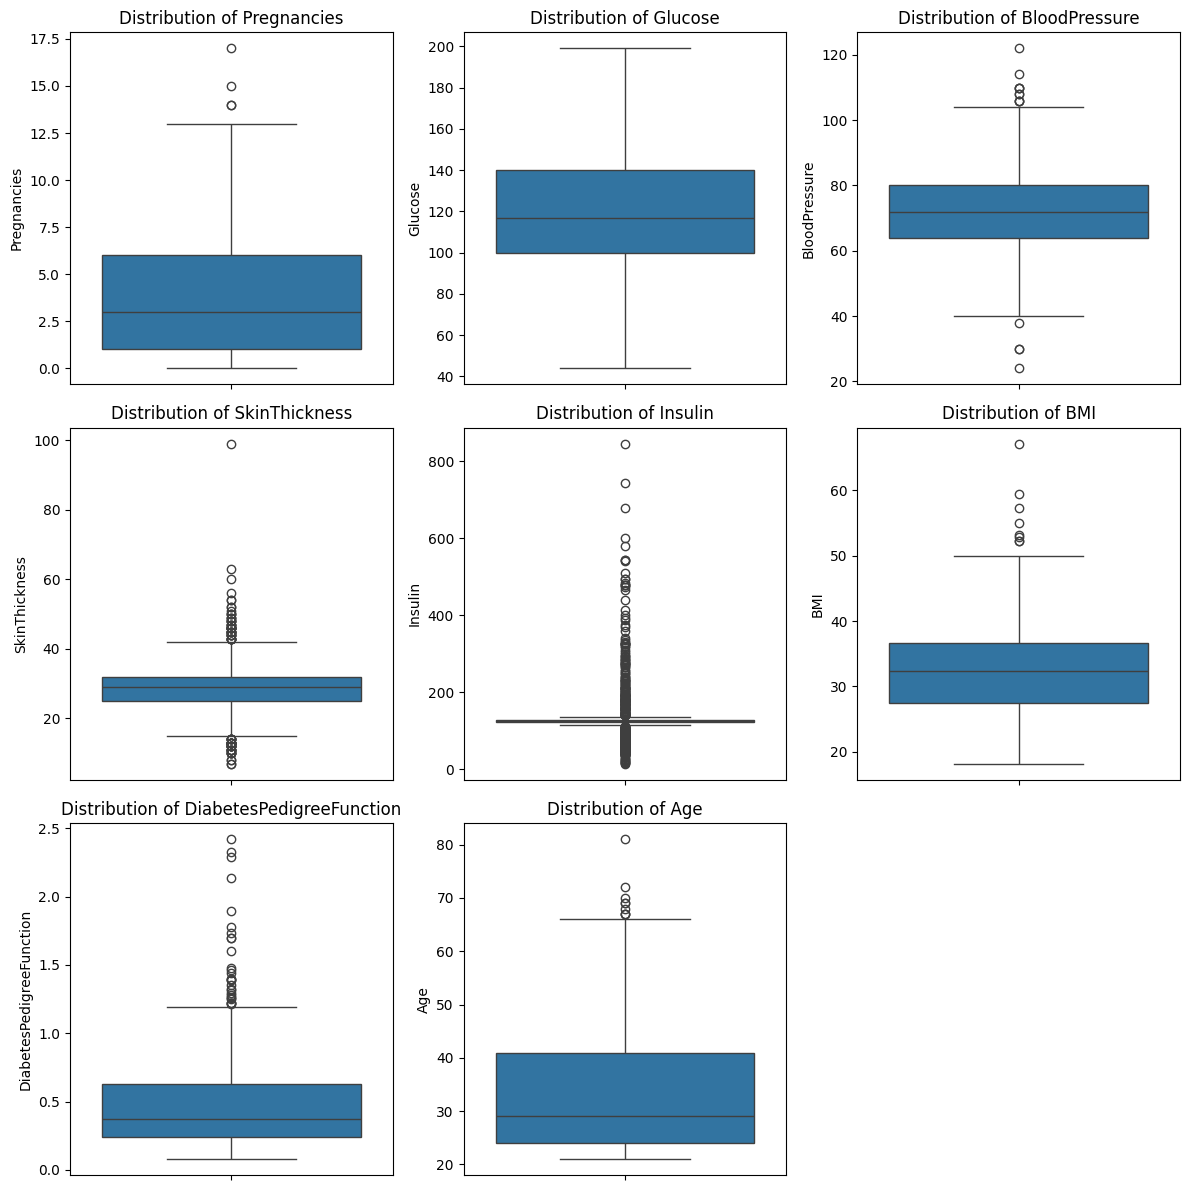

In [630]:
plt.figure(figsize=(12, 12))
for i, col in enumerate(diabetes.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(diabetes[col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

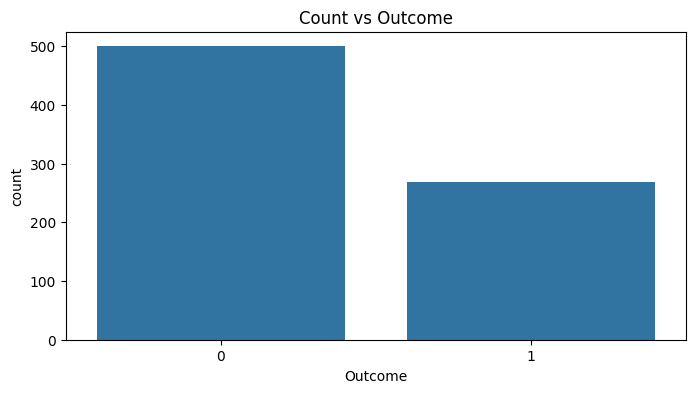

In [633]:
plt.figure(figsize = (8, 4))
sns.countplot(x="Outcome", data=diabetes)
plt.title("Count vs Outcome")
plt.show();

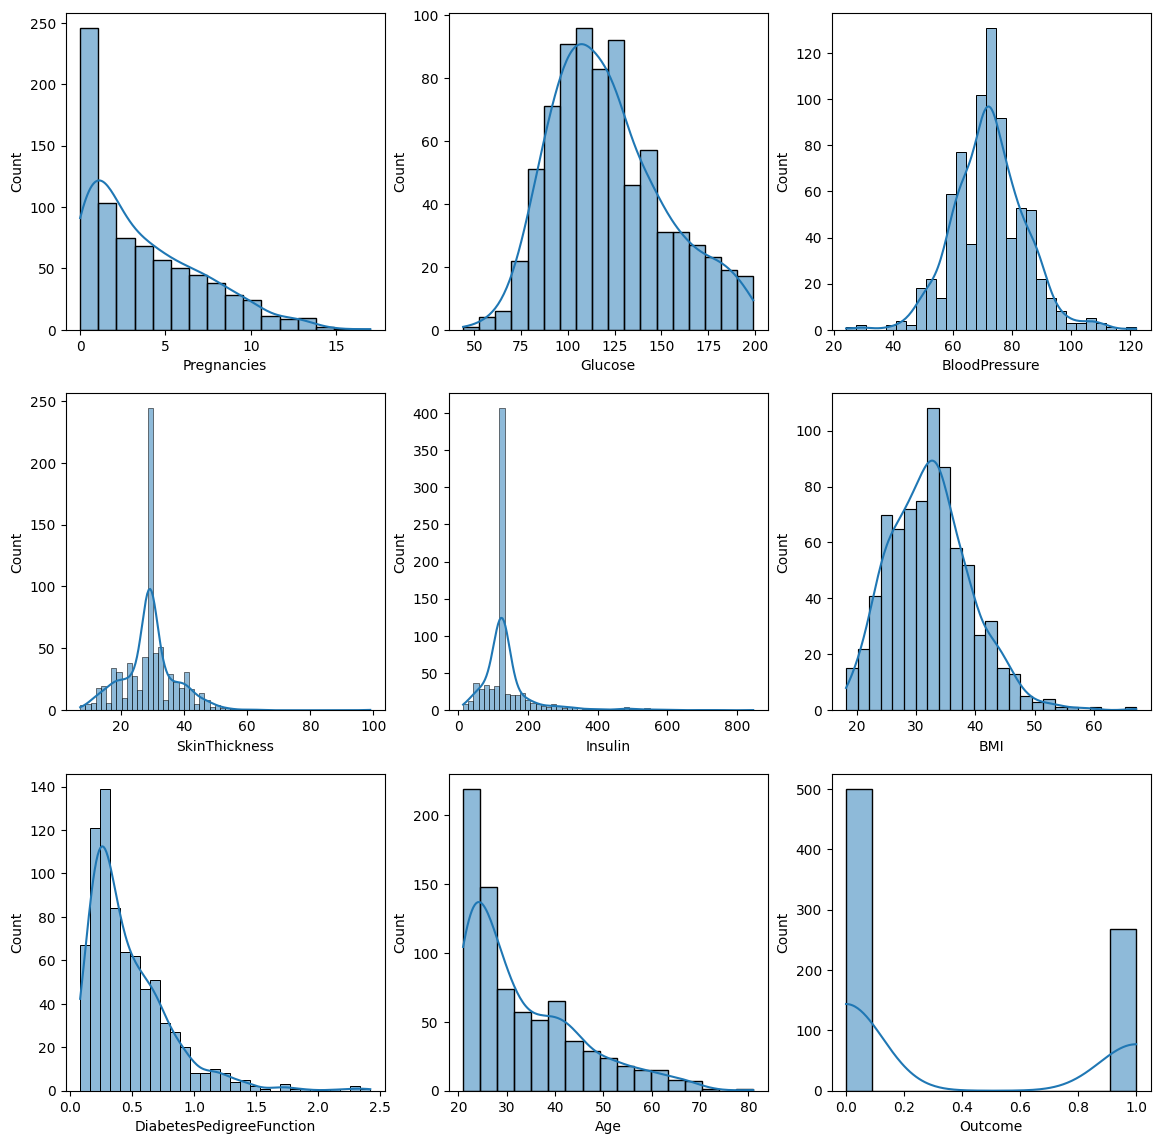

In [634]:
plt.figure(figsize = (14, 14))
for i, col in enumerate(diabetes.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(x=col, data=diabetes, kde=True)
plt.show();

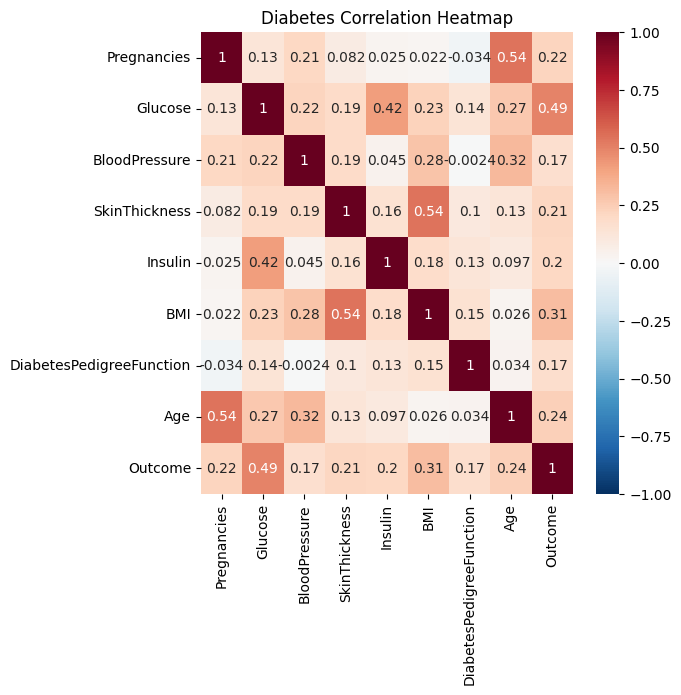

In [664]:
plt.figure(figsize=(6, 6))
sns.heatmap(diabetes.corr(), vmin=-1.0, center=0, cmap='RdBu_r', annot=True)
plt.title("Diabetes Correlation Heatmap")
plt.show()

In [635]:
def remove_outliers(data ,cols):
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data = data[ (data[col] >= lower) & (data[col] <= upper)]
    return data
columns = ["Insulin" , "SkinThickness" , "BloodPressure"] 
diabetes_df = remove_outliers(diabetes.copy(), columns)

In [636]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

In [637]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [638]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training labels:", y_train.value_counts())

Training set shape: (171, 8)
Test set shape: (58, 8)
Training labels: Outcome
0    102
1     69
Name: count, dtype: int64


In [639]:
knn_model = KNeighborsClassifier(n_neighbors=57)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [640]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
print(f"KNN Accuracy: {accuracy_knn*100:.2f}%")
print(f"KNN Recall: {recall_knn*100:.2f}%")
print(f"KNN Precision: {precision_knn*100:.2f}%")
print(f"KNN F1 Score: {f1_knn*100:.2f}%")

KNN Accuracy: 72.41%
KNN Recall: 72.41%
KNN Precision: 71.94%
KNN F1 Score: 72.09%


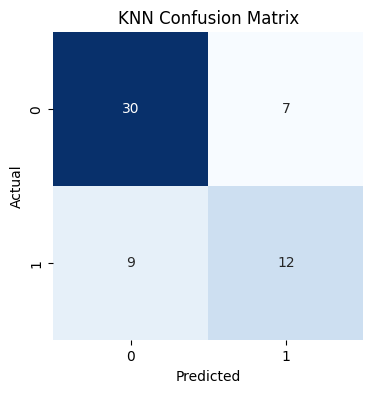

In [641]:
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()

In [642]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        37
           1       0.63      0.57      0.60        21

    accuracy                           0.72        58
   macro avg       0.70      0.69      0.69        58
weighted avg       0.72      0.72      0.72        58



In [643]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [644]:
y_pred = decision_tree_model.predict(X_test)

Accuracy: 0.6724137931034483
Precision: 0.53125
F1 Score 0.6415094339622641


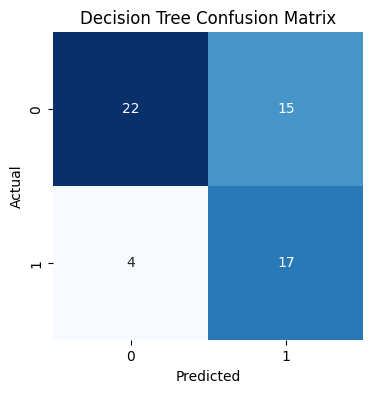

In [663]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score", f1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

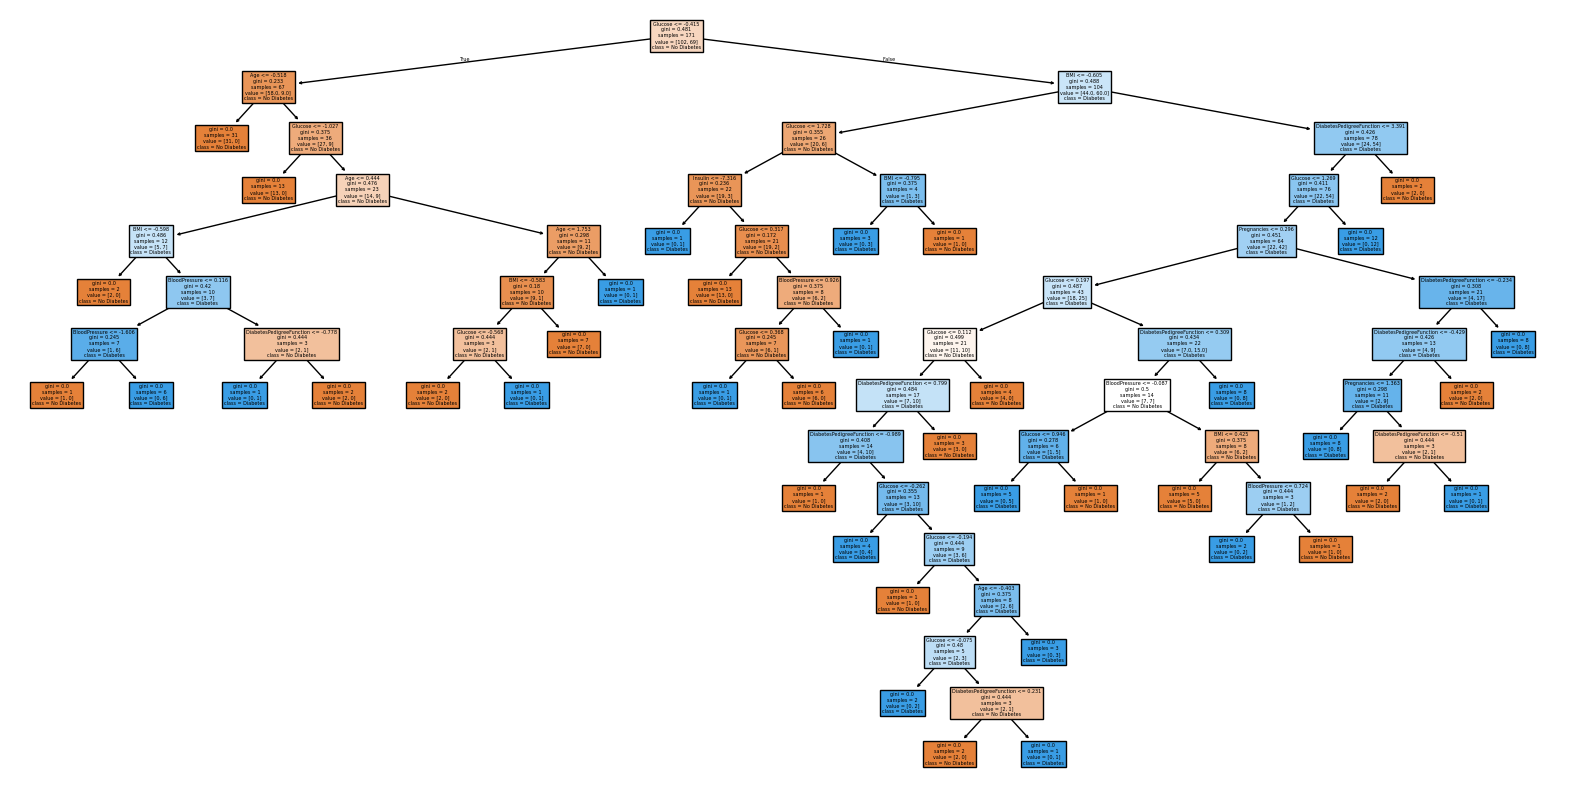

In [646]:
features = list(X.columns)
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_model, feature_names=features, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.savefig('dt.png')
plt.show()

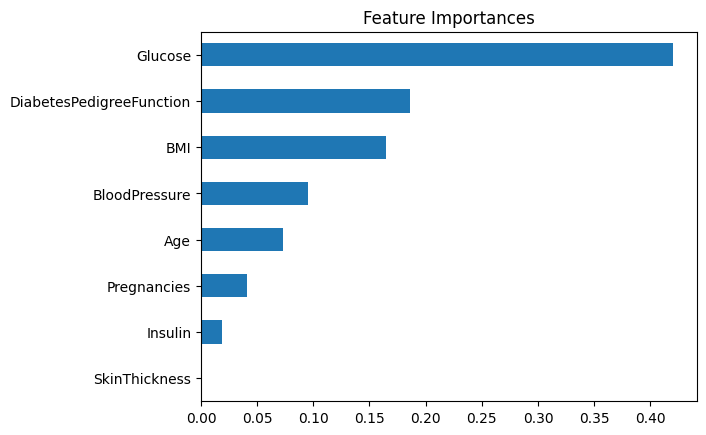

In [647]:
imp_f = pd.Series(decision_tree_model.feature_importances_, index=diabetes_df.columns[0:8])
imp_f.sort_values().plot(kind='barh', title="Feature Importances")
plt.show()

In [648]:
random_forest = RandomForestClassifier(random_state=42, max_depth=3)
random_forest.fit(X_train, y_train)
random_forest_probs = random_forest.predict(X_train)

In [649]:
accuracy = accuracy_score(y_train, random_forest_probs)
random_forest_val = random_forest.predict(X_test)
accuracy_val = accuracy_score(y_test, random_forest_val)
print(f"Random Forest Train Accuracy: {accuracy:.4f}")
print(f"Random Forest Validation Accuracy: {accuracy_val:.4f}")

Random Forest Train Accuracy: 0.8070
Random Forest Validation Accuracy: 0.7586


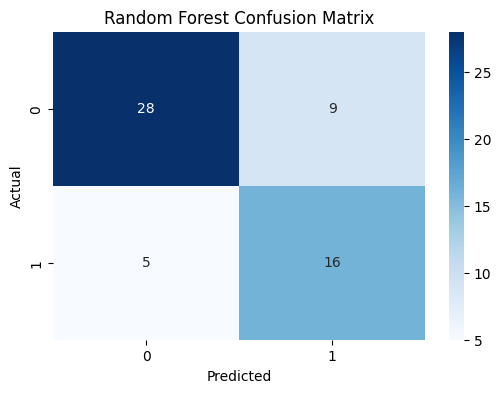

In [650]:
conf_matrix_val = confusion_matrix(y_test, random_forest_val)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [651]:
param_grid = {'n_estimators': [50, 100], 'max_depth': [3, 5, 10]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best AUC Score:", grid.best_score_)

Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best AUC Score: 0.7778466771323913


In [652]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [653]:
decision_tree_smote = DecisionTreeClassifier(random_state=42)
decision_tree_smote.fit(X_train_res, y_train_res)
y_pred_decision_tree_smote = decision_tree_smote.predict(X_test)

In [654]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_decision_tree_smote))
print(classification_report(y_test, y_pred_decision_tree_smote))

Decision Tree Accuracy: 0.6379310344827587
              precision    recall  f1-score   support

           0       0.77      0.62      0.69        37
           1       0.50      0.67      0.57        21

    accuracy                           0.64        58
   macro avg       0.63      0.64      0.63        58
weighted avg       0.67      0.64      0.64        58



In [655]:
knn_smote = KNeighborsClassifier()
knn_smote.fit(X_train_res, y_train_res)
y_pred_knn_smote = knn_smote.predict(X_test)

In [656]:
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn_smote))
print(classification_report(y_test, y_pred_knn_smote))

KNN Accuracy: 0.7068965517241379
              precision    recall  f1-score   support

           0       0.88      0.62      0.73        37
           1       0.56      0.86      0.68        21

    accuracy                           0.71        58
   macro avg       0.72      0.74      0.70        58
weighted avg       0.77      0.71      0.71        58



In [657]:
random_forest_smote = RandomForestClassifier(random_state=42)
random_forest_smote.fit(X_train_res, y_train_res)
y_pred_random_forest_smote  = random_forest_smote.predict(X_test)

In [658]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_random_forest_smote))
print(classification_report(y_test, y_pred_random_forest_smote))

Random Forest Accuracy: 0.7241379310344828
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        37
           1       0.59      0.81      0.68        21

    accuracy                           0.72        58
   macro avg       0.72      0.74      0.72        58
weighted avg       0.76      0.72      0.73        58



In [659]:
model_names = ['Decision Tree', 'KNN', 'Random Forest']
predictions = [y_pred_decision_tree_smote, y_pred_knn_smote, y_pred_random_forest_smote]

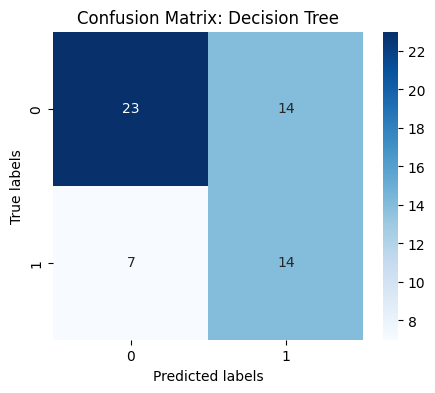

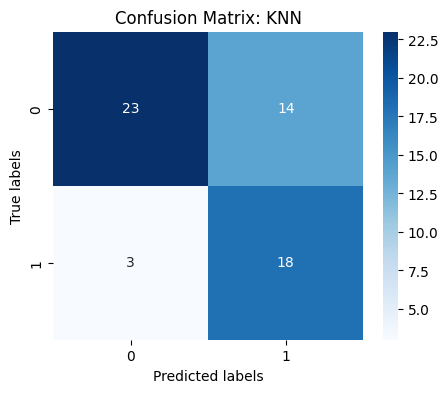

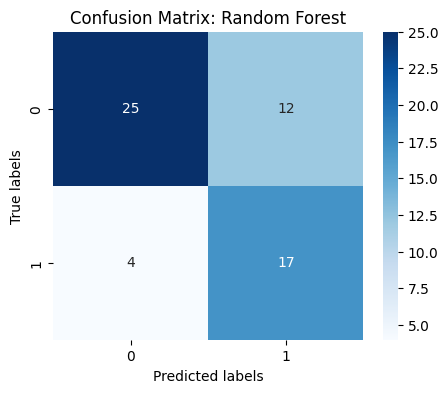

In [660]:
for name, pred in zip(model_names, predictions):
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix: {name}')
    plt.show()

In [661]:
##Results
###The random forest training accuracy was approximately 81% and the validation accuracy was about 76%.
###The KNN accuracy was approximately 72.4% and the precision was about 72%.
###The decision tree accuracy was 67.2% and the precision was about 53.1%.
###After balancing the dataset, the random forest model had an accuracy of 72.4%, the KNN model had an accuracy of 70.7%, and the decision tree had an accuracy of 63.8%.
###Glucose was the top predictor for a diagnosis of diabetes.

In [662]:
##Discussion/Conclusion
###The best model was the random forest algorithm since it had the highest accuracy out of the three models.
###Balancing the dataset improved the performance of the decision tree model, with a higher accuracy. However, the performance was slightly worse for the KNN and random forest models and the accuracy for the two models were slightly lower.
###Some learning points are that preprocessing data is important to ensuring a better performance and training in models; trying multiple models/algorithms, metrics, and hyperparameter tuning are helpful to determine the best model and how to adjust it to improve its performance and accuracy/precision and there is a trade-off between interpretability and performance. It is important to find the right balance between having easy interprebility and having a high performance.
###Further hyperparameter tuning can improve a model's performance and more accurately diagnose diabetes.
###Adding new features, such as family history and HbA1c, can be helpful to see if they improve training models for better performance and accuracy to correctly diagnose diabetes. In addition, I could try using XGBoost algorithm to see if it is a better model with higher accuracy and precision for correctly diagnosing diabetes.